## Этапы анализа данных
    1. Первичная обработка данных.
    2. Определение распределения признака для числовых переменных, устранение выбросов.
    3. Оценка количества уникальных значений для номинативных переменных.
    4. При необходимости преобразование и конвертация данных.
    5. Проведение корреляционного анализа количественных переменных.
    6. Определение не коррелирующих переменных.
    7. Анализ номинативных переменных и устранение тех, которые не влияют на предсказываемую величину.
    8. Формулировака выводов относительно качества данных и тех переменных, которые будут использоваться в дальнейшем при построении модели.

## Описание столбцов

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 studytime, granular — время на учёбу в часах видимо

16 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

17 schoolsup — дополнительная образовательная поддержка (yes или no)

18 famsup — семейная образовательная поддержка (yes или no)

19 paid — дополнительные платные занятия по математике (yes или no)

20 activities — дополнительные внеучебные занятия (yes или no)

21 nursery — посещал детский сад (yes или no)

22 higher — хочет получить высшее образование (yes или no)

23 internet — наличие интернета дома (yes или no)

24 romantic — в романтических отношениях (yes или no)

25 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

26 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

27 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

28 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

29 absences — количество пропущенных занятий

30 score — баллы по госэкзамену по математике

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import analyze_data
from itertools import combinations
from scipy.stats import ttest_ind
   
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

db = pd.read_csv('C:\\Users\\prosa\\source\\repos\\skillfactory_rds\\project 2\\stud_math.xls')

def get_boxplot(yColumn, column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y=yColumn, data=db, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

def get_stat_dif(yColumn, column):
    cols = db.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        x = db.loc[db.loc[:, column] == comb[0], yColumn]
        y = db.loc[db.loc[:, column] == comb[1], yColumn]
        stat = ttest_ind(x, y)
        if stat.pvalue <= 0.05/len(combinations_all):            
            return True
    return False   
        
def get_stat_dif_of(yColumn, columns):
    find = False
    for c in columns:        
        if get_stat_dif(yColumn, c):
            find |= True
            print('Найдены статистически значимые различия для колонки', c)
    if find == False:
        print('Статистически значимые различия НЕ найдены для колонок')

display(db.head(10))
db.info()

db.rename(columns={ db.columns[20]: "studytime_granular" }, inplace = True)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school
GP,349
MS,46


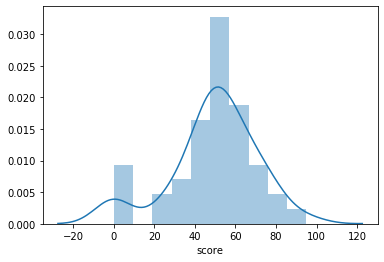

In [269]:
# Анализ столбцов

# school
display(pd.DataFrame(db.school.value_counts()))

score_ms_school=db[db.school == 'MS']['score']
sns.distplot(score_ms_school, bins=10);

Делаем вывод, что ученики 'MS' школы набирают не очень большие баллы. К тому же выборка у них значительно меньше.

In [270]:
# sex
display(pd.DataFrame(db.sex.value_counts()))

,sex
F,208
M,187


,16,17,18,15,19,20,22,21
age,104,98,82,82,24,3,1,1


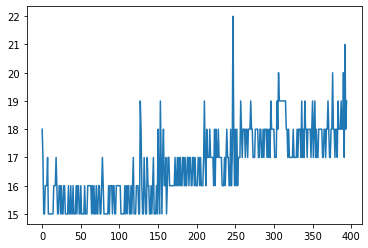


25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


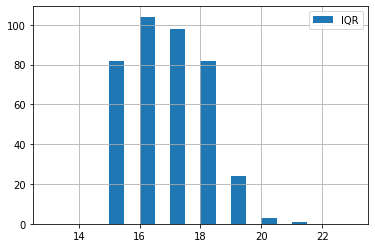

In [212]:
# age
display(pd.DataFrame(db.age.value_counts()).transpose())
plt.figure()
plt.plot(db.age)
plt.show()

median = db.age.median()
perc25 = db.age.quantile(0.25)
perc75 = db.age.quantile(0.75)
IQR = perc75 - perc25

print('\n25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

ft = db.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)
db.age.loc[ft].hist(bins=20, range=(13, 23), label='IQR')
db = db.loc[ft]
plt.legend();

In [213]:
Судя по границе выбросов, выбросов у нас по данному полю нет.

SyntaxError: invalid syntax (<ipython-input-213-b71d3a7c2f17>, line 1)

,U,R
address,294,83


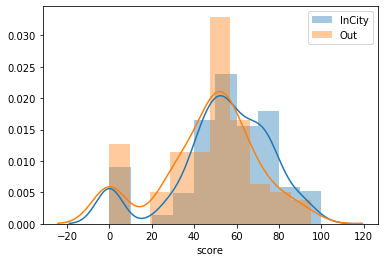

,GT3,LE3
famsize,260,107


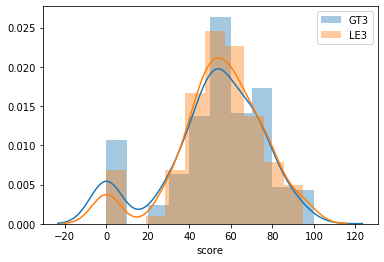

,T,A
Pstatus,313,36


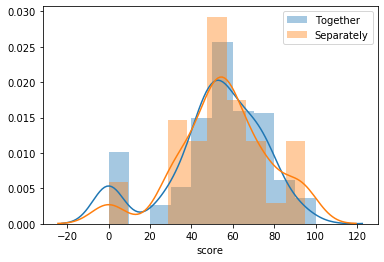

In [214]:
# address
display(pd.DataFrame(db.address.value_counts()).transpose())

plt.figure();
sns.distplot(db[db.address == 'U']['score'], bins=10, label='InCity');
sns.distplot(db[db.address == 'R']['score'], bins=10, label='Out');
plt.legend();
plt.show();

# famsize
display(pd.DataFrame(db.famsize.value_counts()).transpose())

plt.figure();
sns.distplot(db[db.famsize == 'GT3']['score'], bins=10, label='GT3');
sns.distplot(db[db.famsize == 'LE3']['score'], bins=10, label='LE3');
plt.legend();
plt.show();

# Pstatus
display(pd.DataFrame(db.Pstatus.value_counts()).transpose())

plt.figure();
sns.distplot(db[db.Pstatus == 'T']['score'], bins=10, label='Together');
sns.distplot(db[db.Pstatus == 'A']['score'], bins=10, label='Separately');
plt.legend();
plt.show();

Судя по 3-ём графикам распределения результатов теста, можно сделать вывод, что размер семьи (famsize) скорее всего не сильно влияет на оценку, так как значения данного категорийного признака распределенны примерно одинаково, чего нельзя сказать про address и Pstatus. Так как видно, что кол-во хороших оценок больше у тех кто живёт в городе. А по признаку полноценной семьи, вообще можно заметить, что кол-во тех у кого балл больше 90 воспитывались не в полноценной семье. Соответственно есть некая зависимость и влияние на оценку.

,4.0,2.0,3.0,1.0,0.0
Medu,131,102,96,59,3


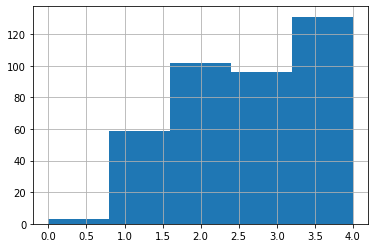

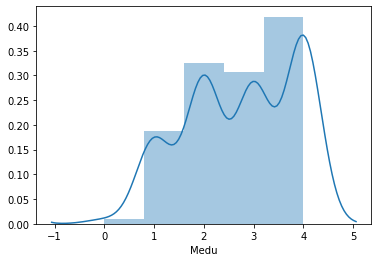

In [215]:
# Medu
display(pd.DataFrame(db.Medu.value_counts()).transpose())
db.Medu.hist(bins=5)
db.Medu.describe()
plt.figure();

sns.distplot(db.Medu, bins=5);


25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


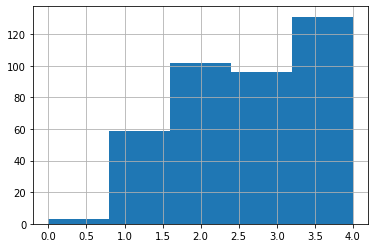

In [216]:
median = db.Medu.median()
perc25 = db.Medu.quantile(0.25)
perc75 = db.Medu.quantile(0.75)
IQR = perc75 - perc25

print('\n25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

ft = db.Medu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)
db.Medu.loc[ft].hist(bins=5, range=(0, 4), label='IQR')
db = db.loc[ft]

Судя по границам выбросов, нулевые значения можно оставить.

,2.0,3.0,4.0,1.0,0.0,40.0
Fedu,105,95,88,76,2,1



25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


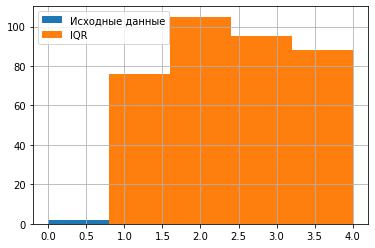

In [217]:
# Fedu
display(pd.DataFrame(db.Fedu.value_counts()).transpose())

median = db.Fedu.median()
perc25 = db.Fedu.quantile(0.25)
perc75 = db.Fedu.quantile(0.75)
IQR = perc75 - perc25

print('\n25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

ft = db.Fedu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)
db.Fedu.hist(bins=5, range=(0, 4), label='Исходные данные')
db.Fedu.loc[ft].hist(bins=5, range=(0, 4), label='IQR')
plt.legend();

Замечаем что присутствует, скорее всего, ошибочное значение 40, так же видим, что значение 0 попадает под критерий выброса.   Соответственно фильтруем эти данные.

count    364.000000
mean       2.535714
std        1.073774
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

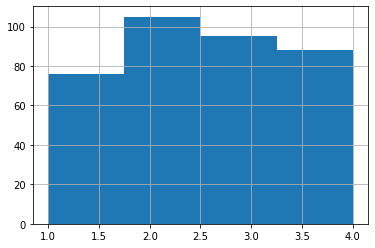

In [218]:
db = db.loc[db.Fedu <= 4]
db = db.loc[ft]
db.Fedu.hist(bins=4)
db.Fedu.describe()

,other,services,at_home,teacher,health
Mjob,122,88,57,47,31


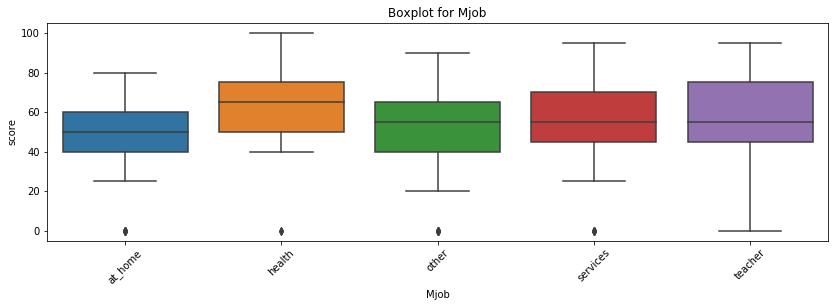

In [219]:
# Mjob
display(pd.DataFrame(db.Mjob.value_counts()).transpose())
get_boxplot('score','Mjob')

,other,services,teacher,at_home,health
Fjob,186,91,26,14,13


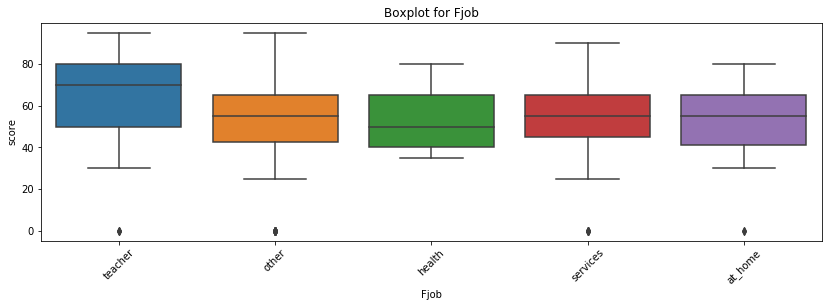

In [220]:
# Fjob
display(pd.DataFrame(db.Fjob.value_counts()).transpose())
get_boxplot('score','Fjob')

,course,reputation,home,other
reason,127,95,95,31


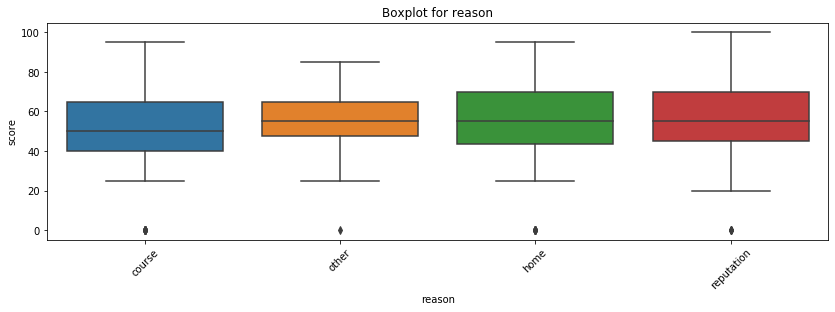

In [221]:
# reason
display(pd.DataFrame(db.reason.value_counts()).transpose())
get_boxplot('score','reason')

,mother,father,other
guardian,232,76,26


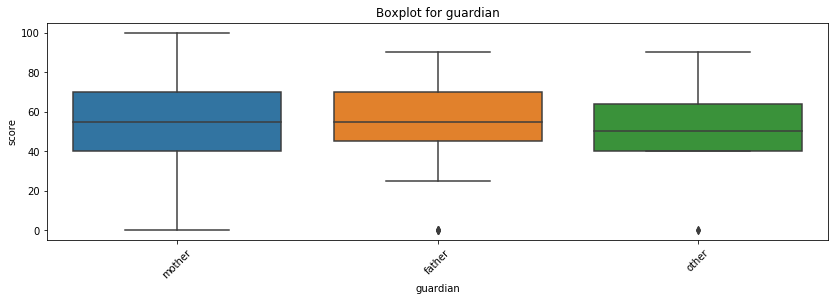

In [222]:
# guardian
display(pd.DataFrame(db.guardian.value_counts()).transpose())
get_boxplot('score','guardian')

,1.0,2.0,3.0,4.0
traveltime,221,90,21,7



25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


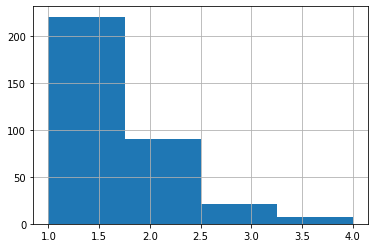

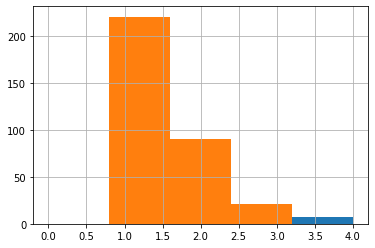

In [223]:
# traveltime
display(pd.DataFrame(db.traveltime.value_counts()).transpose())
db.traveltime.hist(bins=4)
db.traveltime.describe()

plt.figure();
median = db.traveltime.median()
perc25 = db.traveltime.quantile(0.25)
perc75 = db.traveltime.quantile(0.75)
IQR = perc75 - perc25

print('\n25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

ft = db.traveltime.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)
db.traveltime.hist(bins=5, range=(0, 4), label='Исходные данные')
db.traveltime.loc[ft].hist(bins=5, range=(0, 4), label='IQR')
plt.show();

db = db.loc[db.traveltime.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

Видим выброс, соответственно фильтруем данные.

,2.0,1.0,3.0,4.0
studytime,164,87,53,22



25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


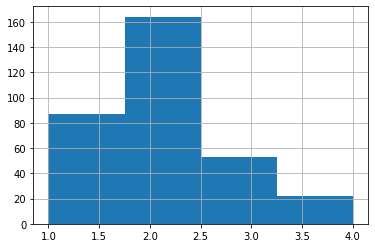

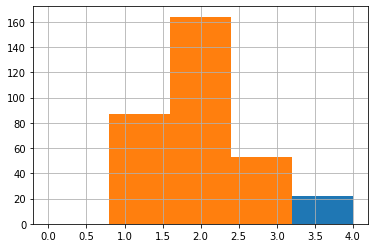

In [224]:
# studytime
display(pd.DataFrame(db.studytime.value_counts()).transpose())
db.studytime.hist(bins=4)
db.studytime.describe()

plt.figure();
median = db.studytime.median()
perc25 = db.studytime.quantile(0.25)
perc75 = db.studytime.quantile(0.75)
IQR = perc75 - perc25

print('\n25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

ft = db.studytime.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)
db.studytime.hist(bins=5, range=(0, 4), label='Исходные данные')
db.studytime.loc[ft].hist(bins=5, range=(0, 4), label='IQR')
plt.show();

,-6.0,-3.0,-9.0,-12.0
studytime_granular,164,87,53,22


count    326.000000
mean      -6.092025
std        2.511046
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

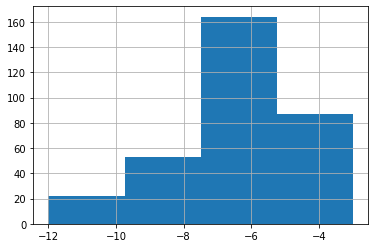

In [225]:
# studytime_granular
display(pd.DataFrame(db.studytime_granular.value_counts()).transpose())
db.studytime_granular.hist(bins=4)
db.studytime_granular.describe()

,0.0,1.0,2.0,3.0
failures,252,41,13,11


count    317.000000
mean       0.315457
std        0.712577
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

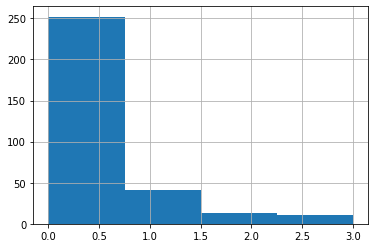

In [226]:
# failures
display(pd.DataFrame(db.failures.value_counts()).transpose())
db.failures.hist(bins=4)
db.failures.describe()

In [227]:
# schoolsup
display(pd.DataFrame(db.schoolsup.value_counts()).transpose())

# famsup
display(pd.DataFrame(db.famsup.value_counts()).transpose())

# paid
display(pd.DataFrame(db.paid.value_counts()).transpose())

# activities
display(pd.DataFrame(db.activities.value_counts()).transpose())

# nursery
display(pd.DataFrame(db.nursery.value_counts()).transpose())

# higher
display(pd.DataFrame(db.higher.value_counts()).transpose())

# internet
display(pd.DataFrame(db.internet.value_counts()).transpose())

# romantic
display(pd.DataFrame(db.romantic.value_counts()).transpose())

,no,yes
schoolsup,282,42


,yes,no
famsup,184,119


,no,yes
paid,167,133


,yes,no
activities,162,157


,yes,no
nursery,248,68


,yes,no
higher,302,15


,yes,no
internet,257,47


,no,yes
romantic,206,104


,4.0,5.0,3.0,2.0,1.0,-1.0
famrel,156,82,51,15,5,1



25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


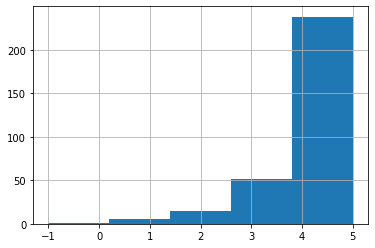

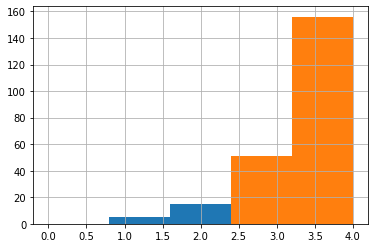

In [228]:
# famrel
display(pd.DataFrame(db.famrel.value_counts()).transpose())
db.famrel.hist(bins=5)
db.famrel.describe()

plt.figure();
median = db.famrel.median()
perc25 = db.famrel.quantile(0.25)
perc75 = db.famrel.quantile(0.75)
IQR = perc75 - perc25

print('\n25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

ft = db.famrel.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)
db.famrel.hist(bins=5, range=(0, 4), label='Исходные данные')
db.famrel.loc[ft].hist(bins=5, range=(0, 4), label='IQR')
plt.show();

Замечаем одно несоответствующее значение (-1). Исключим его из выборки.

count    309.000000
mean       3.954693
std        0.877877
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

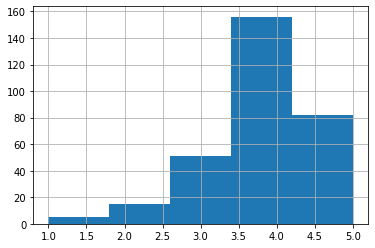

In [229]:
db = db.loc[db.famrel > 0]
db.famrel.hist(bins=5)
db.famrel.describe()

,3.0,4.0,2.0,5.0,1.0
freetime,120,85,51,30,14


count    300.000000
mean       3.220000
std        0.997455
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

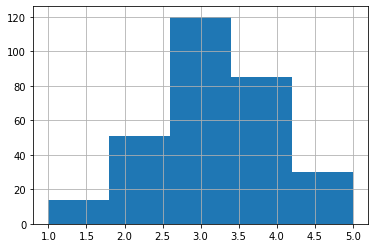

In [230]:
# freetime
display(pd.DataFrame(db.freetime.value_counts()).transpose())
db.freetime.hist(bins=5)
db.freetime.describe()

,3.0,2.0,4.0,5.0,1.0
goout,107,75,67,37,17


count    303.000000
mean       3.105611
std        1.083624
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

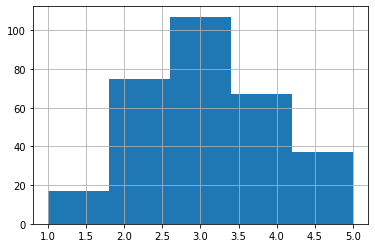

In [231]:
# goout
display(pd.DataFrame(db.goout.value_counts()).transpose())
db.goout.hist(bins=5)
db.goout.describe()

,5.0,3.0,4.0,2.0,1.0
health,95,75,52,38,38


count    298.000000
mean       3.429530
std        1.381723
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

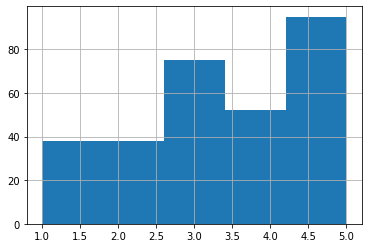

In [232]:
# health
display(pd.DataFrame(db.health.value_counts()).transpose())
db.health.hist(bins=5)
db.health.describe()

In [233]:
# absences
display(pd.DataFrame(db.absences.value_counts()).transpose())
db.absences.describe()



,0.0,4.0,2.0,6.0,8.0,10.0,12.0,3.0,14.0,16.0,5.0,7.0,20.0,22.0,18.0,9.0,15.0,1.0,17.0,11.0,23.0,40.0,38.0,25.0,54.0,21.0,26.0,56.0,24.0,28.0,212.0,13.0,385.0
absences,85,46,45,23,17,12,10,8,7,6,4,4,3,3,3,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


count    297.000000
mean       7.599327
std       26.143401
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

Замечаем много выбросов в сторону увеличения значений, начиная с 20. Отфильтруем данные.


25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


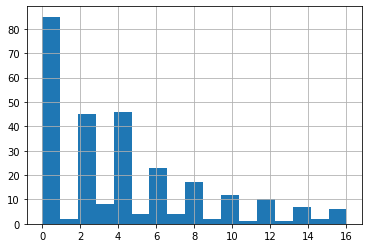

count    282.000000
mean       4.464539
std        4.806633
min        0.000000
25%        0.000000
50%        4.000000
75%        6.000000
max       20.000000
Name: absences, dtype: float64

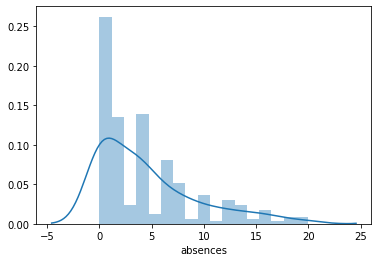

In [234]:
median = db.absences.median()
perc25 = db.absences.quantile(0.25)
perc75 = db.absences.quantile(0.75)
IQR = perc75 - perc25

print('\n25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

ft = db.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)
plt.figure();
db.absences.loc[ft].hist(bins=17, range=(0, 16), label='IQR')
plt.show();

db = db.loc[ft]
sns.distplot(db.absences, bins=17);

db.absences.describe()

По графикам видно, что нечётное количество прогулов распределенно в меньшем количестве, чем чётное. Странная закономерность, но всё же. 



25-й перцентиль: 0.0, 75-й перцентиль: 6.0, IQR: 6.0,  Границы выбросов: [-9.0, 15.0].


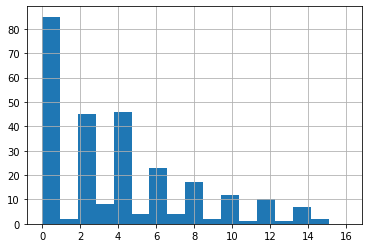

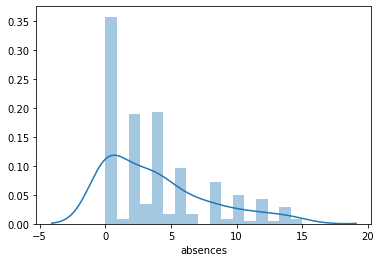

In [235]:
median = db.absences.median()
perc25 = db.absences.quantile(0.25)
perc75 = db.absences.quantile(0.75)
IQR = perc75 - perc25

print('\n25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

ft = db.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)
plt.figure();
db.absences.loc[ft].hist(bins=17, range=(0, 16), label='IQR')
plt.show();

db = db.loc[ft]
db.absences.describe()

sns.distplot(db.absences, bins=17);

,50.0,55.0,0.0,70.0,65.0,75.0,60.0,40.0,45.0,80.0,30.0,90.0,35.0,25.0,95.0,85.0,100.0
score,41,32,27,23,22,21,20,19,16,14,9,7,5,3,2,2,1


count    264.000000
mean      52.405303
std       22.885700
min        0.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

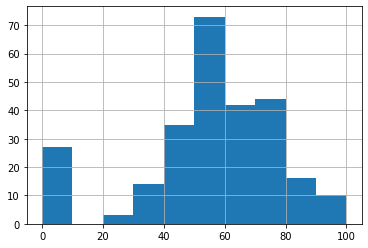

In [236]:
# score
display(pd.DataFrame(db.score.value_counts()).transpose())
db.score.hist()
db.score.describe()

Замечаем, что достаточно много кто получил нулевой бал. Тут можно рассуждать так. Или на все вопросы ответ был неверный, или по какой-то причине была аннуляция результатов. Попробуем в дальнейшем выяснить взаимосвязь с нулевой оценкой.

### Приступим к корреялционному анализу

In [237]:
#sns.pairplot(db, kind = 'reg', corner=True)
db.corr()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.198485,-0.178344,0.113042,0.001594,0.181177,-0.001594,0.021488,0.045834,0.082413,-0.017628,0.083906,-0.148645
Medu,-0.198485,1.000000,0.666636,-0.136257,0.075696,-0.251964,-0.075696,-0.033639,-0.008922,0.028149,-0.055166,0.107767,0.203920
Fedu,-0.178344,0.666636,1.000000,-0.131963,-0.009532,-0.259173,0.009532,-0.030215,-0.004926,0.003197,-0.023826,0.049660,0.095891
traveltime,0.113042,-0.136257,-0.131963,1.000000,-0.160878,0.034170,0.160878,-0.031807,-0.032081,-0.062390,-0.000828,-0.052108,-0.099599
studytime,0.001594,0.075696,-0.009532,-0.160878,1.000000,-0.096609,-1.000000,0.081730,-0.130928,-0.051551,-0.069932,0.013849,0.101750
failures,0.181177,-0.251964,-0.259173,0.034170,-0.096609,1.000000,0.096609,-0.032026,0.120384,-0.031405,0.096398,0.046180,-0.321944
studytime_granular,-0.001594,-0.075696,0.009532,0.160878,-1.000000,0.096609,1.000000,-0.081730,0.130928,0.051551,0.069932,-0.013849,-0.101750
famrel,0.021488,-0.033639,-0.030215,-0.031807,0.081730,-0.032026,-0.081730,1.000000,0.158359,0.042352,0.122775,-0.079891,0.063724
freetime,0.045834,-0.008922,-0.004926,-0.032081,-0.130928,0.120384,0.130928,0.158359,1.000000,0.267097,0.125911,0.031461,0.042601
goout,0.082413,0.028149,0.003197,-0.062390,-0.051551,-0.031405,0.051551,0.042352,0.267097,1.000000,0.019066,0.042625,-0.163684


Первым делом в глаза попадает чёткая линейная (обратная) зависимость studytime от studytime_granular. Поэтому второй параметр можно не рассматривать и исключить из выборки.

Так можно увидеть некую слабую зависимость между:
- age и Medu, failures, absences, score
- Medu и Fedu, traveltime, failures, absences, score
- Fedu и traveltime, failures
- studytime и score
- failures и health, absences, score
- famrel и freetime, health.
- freetime и goout, health
- goout и health, absences, score
- absences и score
- score и age, Medu, studytime, failures, goout, absences

В такой зависимости наверно есть доля правды, ведь получается вот что. Свободное время хорошо зависит от отношений в семье, от общения с друзьями и от здоровья. В свою очередь здоровье зависит от количества внеучебных неудач. Количество внеучебных неудач зависит от возраста, образования родителей и времени на учёбу помимо школы. Чтобы детальнее разобраться необходимо попарсное сравнение данных признаков. 

In [238]:
db.drop(['studytime_granular'], inplace = True, axis = 1)

Выделим все нечисловые значения в отдельный датасет со значением оценки (score).

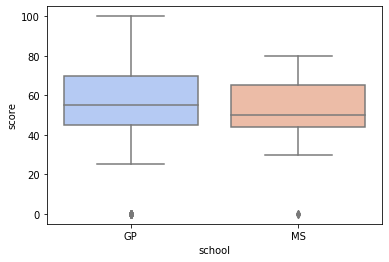

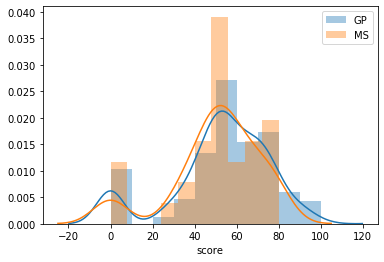

In [239]:
plt.figure();
sns.boxplot(x="school", y="score", data=db, palette="coolwarm");
plt.show();

plt.figure();
sns.distplot(db[db.school == 'GP']['score'], bins=10, label='GP');
sns.distplot(db[db.school == 'MS']['score'], bins=10, label='MS');
plt.legend();
plt.show();

Можно заметить, что данный признак следует оставить, так как заметно, что ученники школы GP, получают больше положительных оценок, так же помним, что выборка у них больше. То есть ученников со школы MS представлены в меньшем кол-ве и там разброс оценок меньше, к тому же крайне мало высоких оценок.

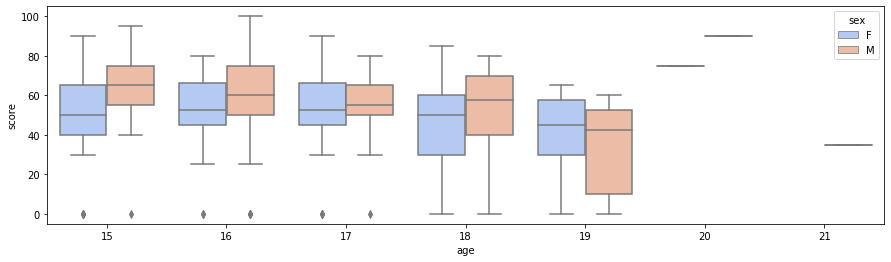

<Figure size 432x288 with 0 Axes>

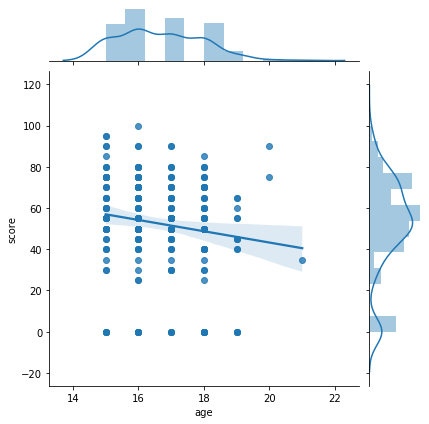

In [240]:
plt.figure(figsize=(15,4));
sns.boxplot(x="age", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

plt.figure();
sns.jointplot(x='age', y='score', data=db, kind='reg');
plt.show();

Возраст следует оставить, достаточно забавная получается картина, если смотреть в разрезе пола. Забавно, что у 18-летних медианное значение одинаково. Ну и в маленьком возрасте у мальчиков больше хороших оценок, чем у девочек. Лично я был уверен, что пол не будет так влиять и что тут всё будет примерно одинаково. Однако если рассматривать второй рисунок, то тут вроде как все есть варианты, вроде как нет влияния. Давайте отфильтруем данные по возрасту, оставим строго меньше 20 лет.

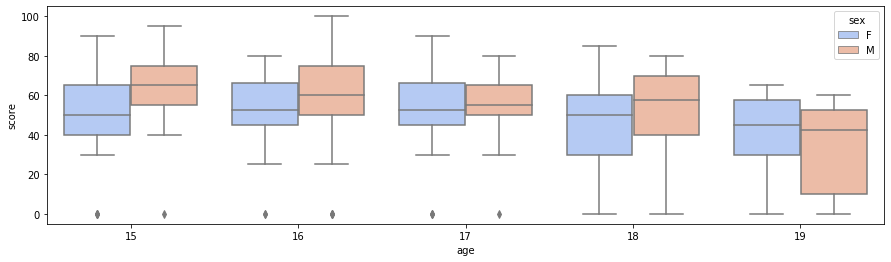

<Figure size 432x288 with 0 Axes>

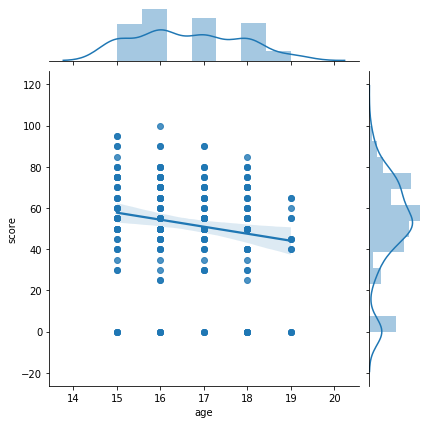

In [241]:
db2 = db.loc[db.age < 20]

plt.figure(figsize=(15,4));
sns.boxplot(x="age", y="score", hue="sex", data=db2, palette="coolwarm");
plt.show();

plt.figure();
sns.jointplot(x='age', y='score', data=db2, kind='reg');
plt.show();

После удаления тех кому старше 20, у нас всё равно остаётся такая же регрессия, получается не зря они не выходили за пределы выбросов. Чем старше, тем хуже результат.

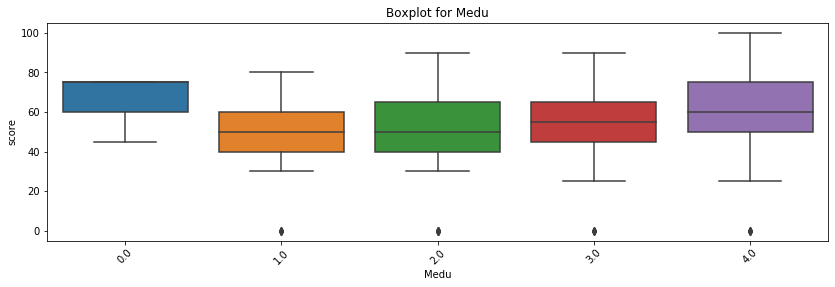

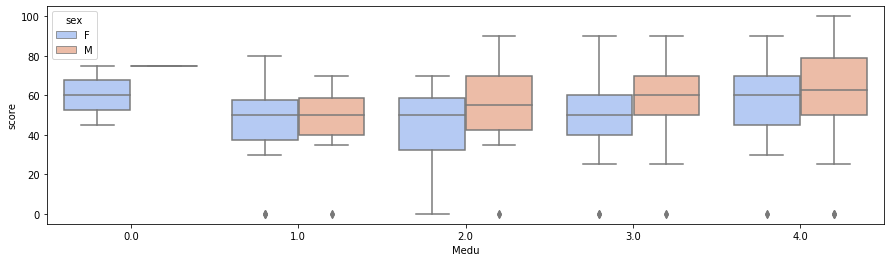

<Figure size 432x288 with 0 Axes>

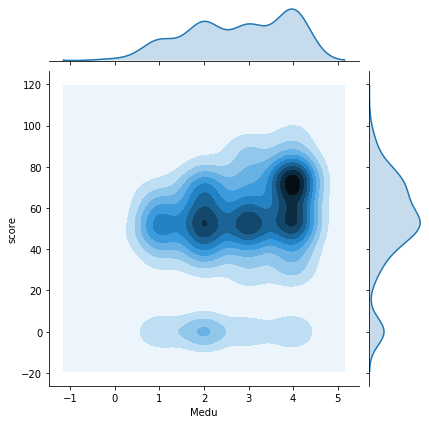

In [242]:
get_boxplot('score','Medu')

plt.figure(figsize=(15,4));
sns.boxplot(x="Medu", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

plt.figure();
sns.jointplot(x='Medu', y='score', data=db, kind='kde');
plt.show();

Данный признак следует оставить, так как видим, что хоть это и категорийнный признак, но всё же тут явная зависимость по отношению к возрастанию этого числа. Что бы они не значили, чем выше число, тем больше совпадений и тем больше хороших оценок. Но мы-то знаем, что цифра 4 означает, что у мамы высшее образование, а маленькое число означает, что высшего образования нет.

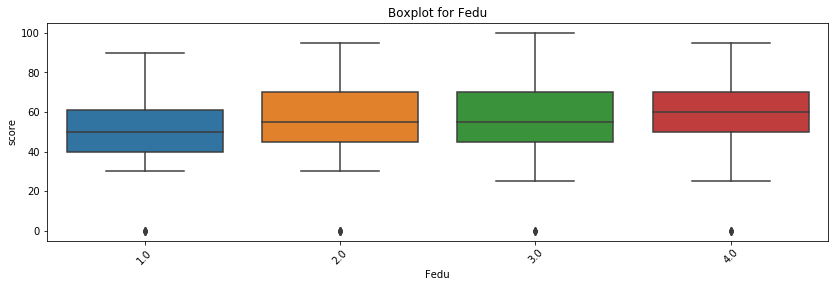

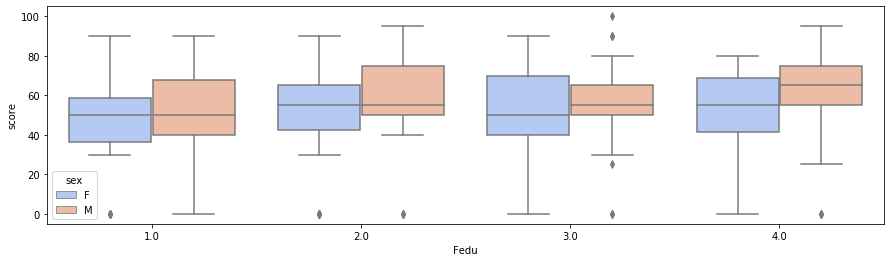

<Figure size 432x288 with 0 Axes>

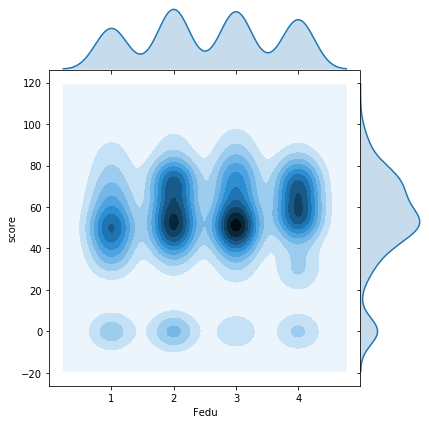

In [243]:
get_boxplot('score','Fedu')

plt.figure(figsize=(15,4));
sns.boxplot(x="Fedu", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

plt.figure();
sns.jointplot(x='Fedu', y='score', data=db, kind='kde', space=0);
plt.show();

Выходит, что данный признак мало связан с результатами оценок по математике, поэтому исключим его из претенденов участия в обучении модели.

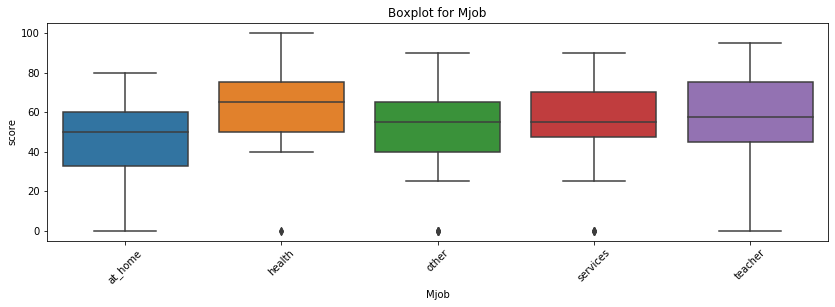

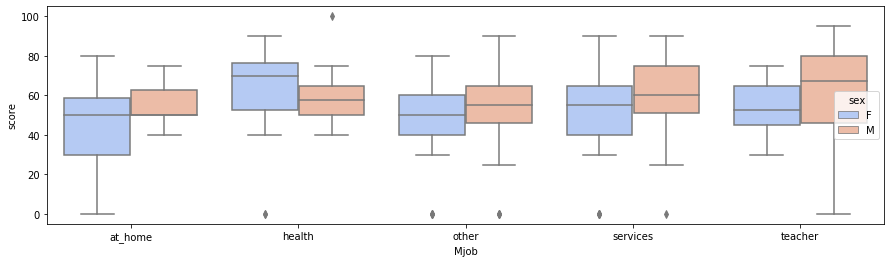

In [244]:
get_boxplot('score','Mjob')

plt.figure(figsize=(15,4));
sns.boxplot(x="Mjob", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

Очевидно, что данный признак оставляем, так как достаточно много разных вариантов получаем, если сравниваем в разрезе пола. У мам, которые работают учителями их сыновья чаше получают плохую оценку, нежели девочки. Делаем вывод, что учителя мамы, с мальчиками не дружат. Посмотрим на профессию папы.

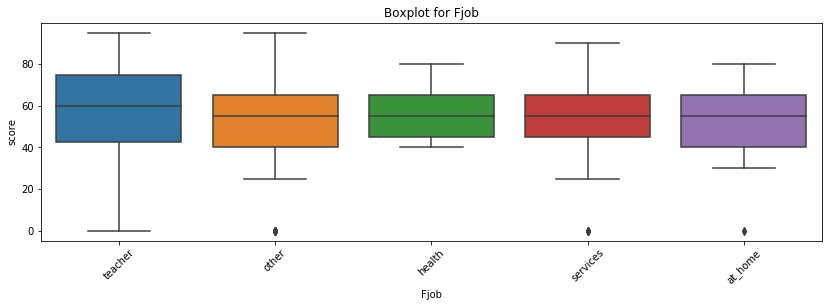

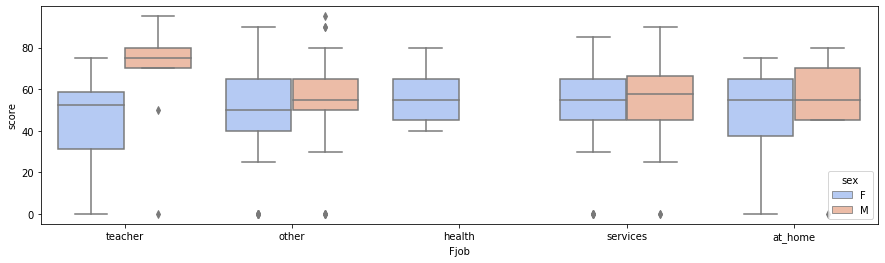

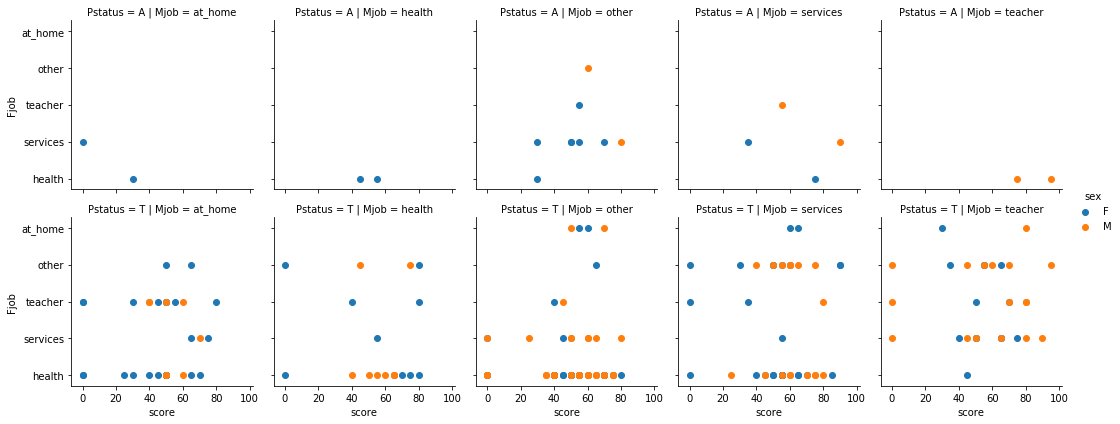

In [245]:
get_boxplot('score','Fjob')

plt.figure(figsize=(15,4));
sns.boxplot(x="Fjob", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

g = sns.FacetGrid(db, col="Mjob", row="Pstatus", hue='sex')
g = g.map(plt.scatter, "score", "Fjob").add_legend();

Ну и очевидно получаем, что отцы учителя не дружат с девочками. Как минимум забавно. Оставить этот признак не можем, потому что медианное значение как правило одинаково.

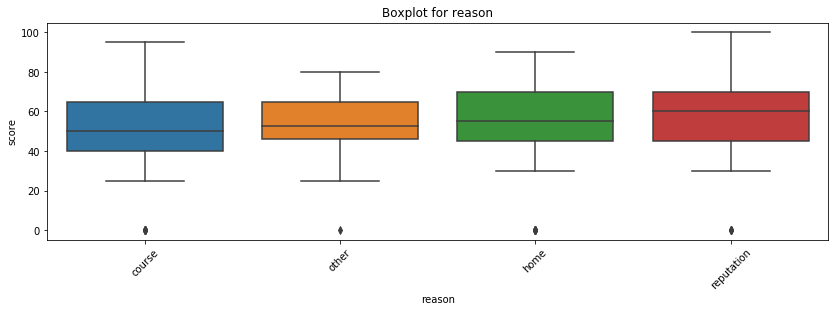

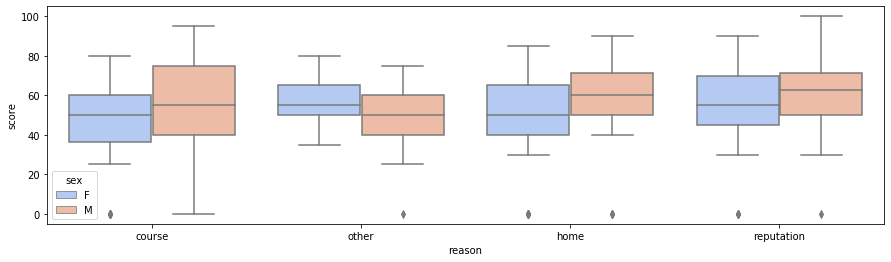

In [246]:
get_boxplot('score','reason')

plt.figure(figsize=(15,4));
sns.boxplot(x="reason", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

Данный признак следует оставить, так как видим, что репутация и школьная программа лучше влияет на высокую оценку.

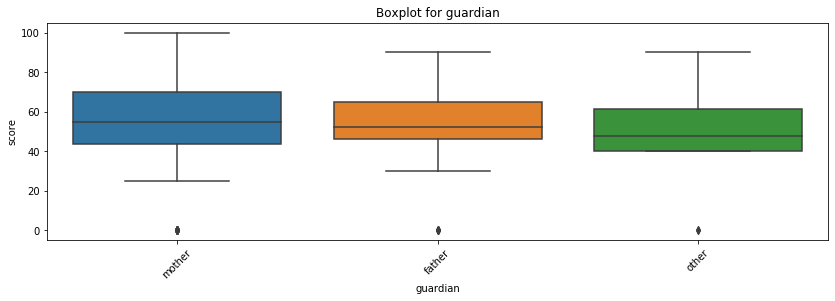

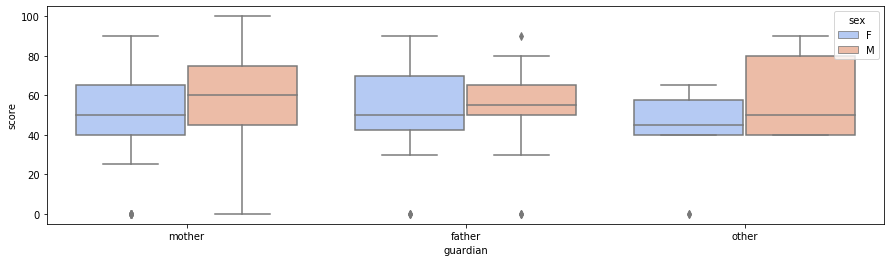

In [247]:
get_boxplot('score','guardian')

plt.figure(figsize=(15,4));
sns.boxplot(x="guardian", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

По данному признаку видим, что у 3-х групп значений примерно одинаковое медианное значение. Уберём данный признак.

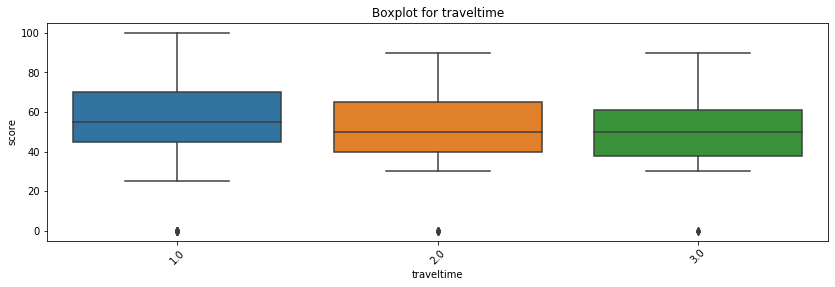

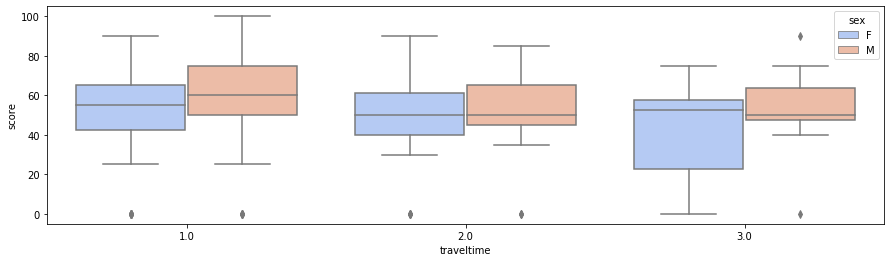

<Figure size 432x288 with 0 Axes>

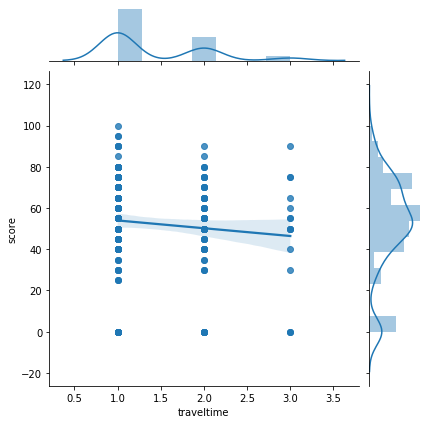

In [248]:
get_boxplot('score','traveltime')

plt.figure(figsize=(15,4));
sns.boxplot(x="traveltime", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

plt.figure();
sns.jointplot(x='traveltime', y='score', data=db, kind='reg');
plt.show();

Данный признак тоже не очень сильно показывается, что есть какая-то зависимость, да и по логике время потраченное на дорогу, может только повлиять, развче что ты опоздаешь, но мы всё равно опустим данный признак. Так как медианные значения примерно одинаковы.

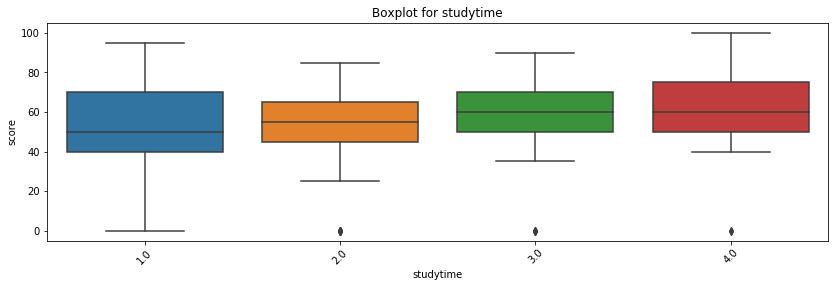

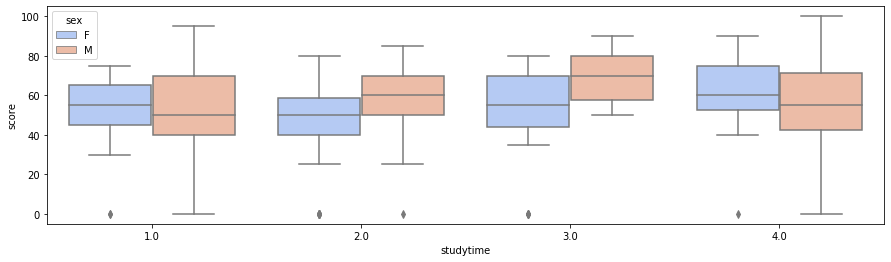

<Figure size 432x288 with 0 Axes>

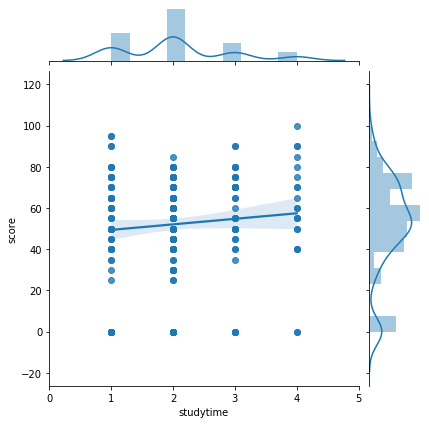

In [249]:
get_boxplot('score','studytime')

plt.figure(figsize=(15,4));
sns.boxplot(x="studytime", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

plt.figure();
sns.jointplot(x='studytime', y='score', data=db, kind='reg');
plt.show();

Оставим этот признак так как видим слабую регрессию в сторону увеличения значения, а это означает, что кто больше тратит время на учёбу, у тех выше будет балл.

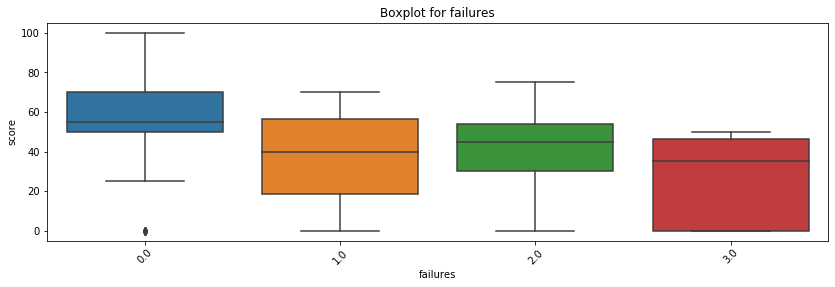

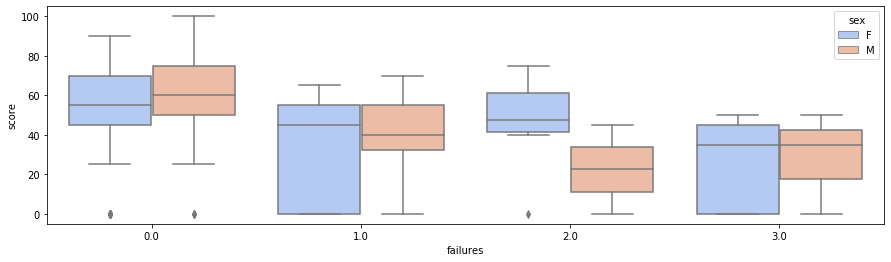

In [250]:
get_boxplot('score','failures')

plt.figure(figsize=(15,4));
sns.boxplot(x="failures", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();



Судя по разбросу на графике данный признак следует оставить, так как очень сильно гуляют и границы выбросов и медианные значения.

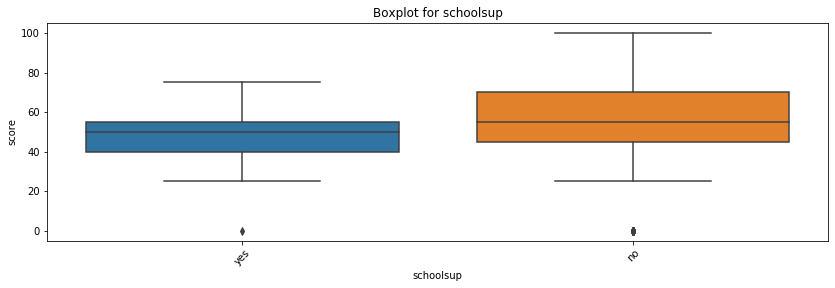

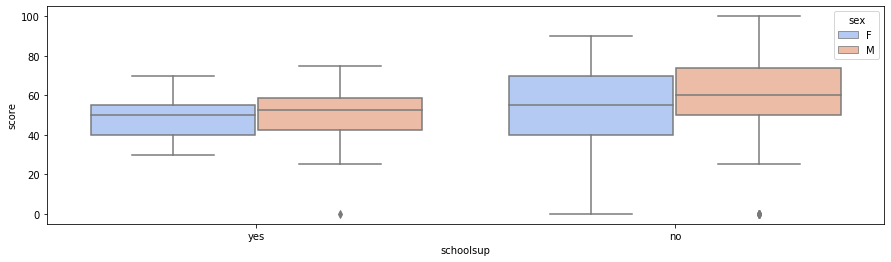

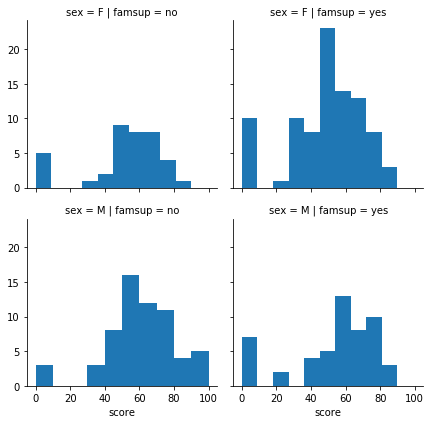

In [251]:
get_boxplot('score','schoolsup')

plt.figure(figsize=(15,4));
sns.boxplot(x="schoolsup", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

g = sns.FacetGrid(db, col="famsup", row="sex")
g = g.map(plt.hist, "score").add_legend();

Оставим данный критерий, так как видим, что хоть что если нет поддержки, то больше высоких баллов.

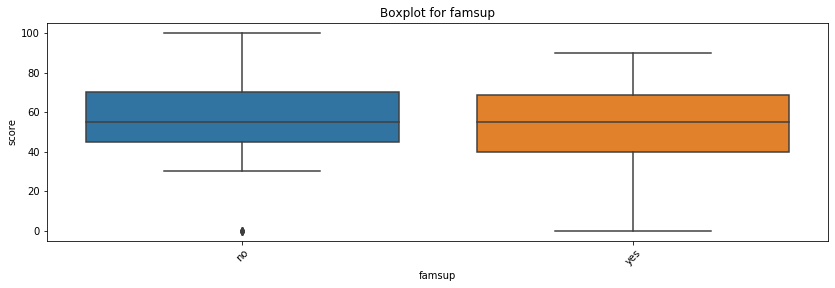

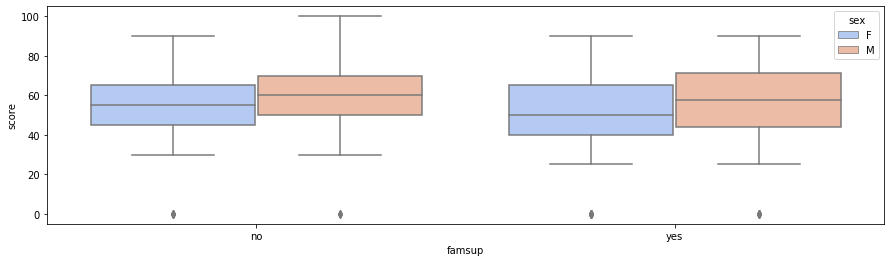

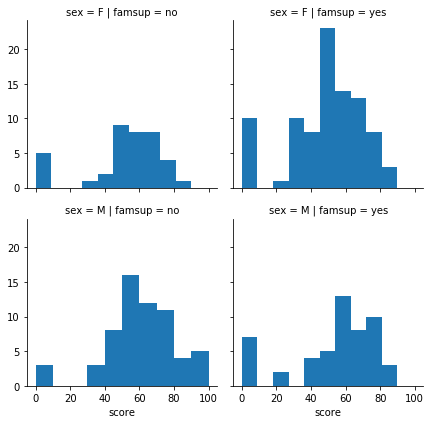

In [252]:
get_boxplot('score','famsup')

plt.figure(figsize=(15,4));
sns.boxplot(x="famsup", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

g = sns.FacetGrid(db, col="famsup", row="sex")
g = g.map(plt.hist, "score").add_legend();

Оставляем этот критерий, так как видим закономерность в том, что маличиков лучше не поддерживать, тогда больше будет максимальных результатов. Или у нас просто выборка такая, что в ней мало было мальчиков, кого поддерживали, хотя по половому признаку кол-во примерно одинаково в нашем наборе.

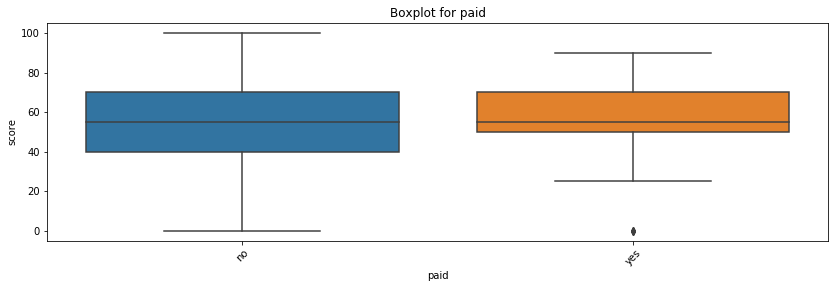

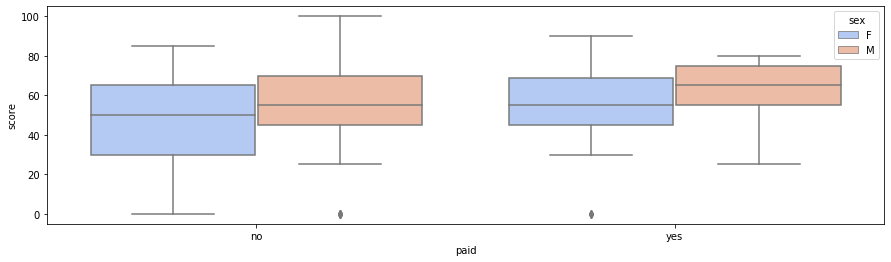

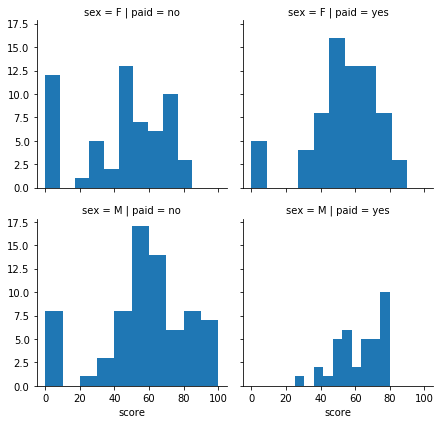

In [253]:
get_boxplot('score','paid')

plt.figure(figsize=(15,4));
sns.boxplot(x="paid", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

g = sns.FacetGrid(db, col="paid", row="sex")
g = g.map(plt.hist, "score").add_legend();

Оставляем, так как видим опять, что мальчиков с высоким баллом больше если не проходили доп занятия. Они наверно тратили больше времени с друзьями, а это скорее хорошо вляет на общее эмоциональное состояние и здоровье. Что в свою очередь позволяет хорошо подготовится к тестам.

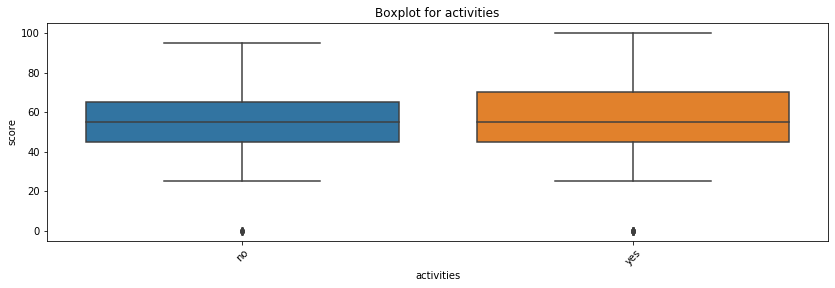

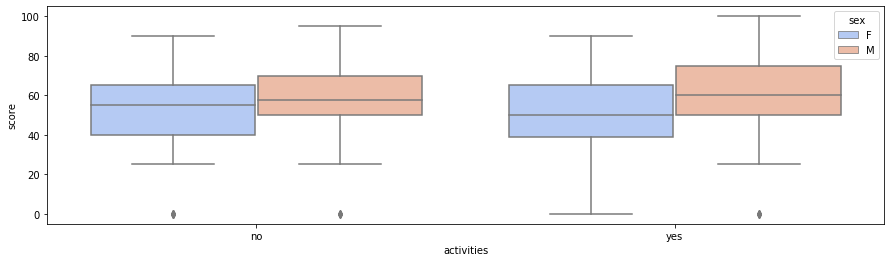

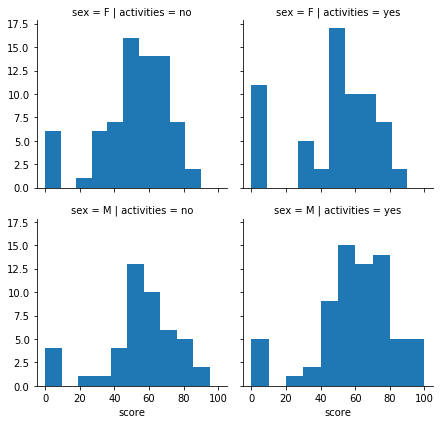

In [254]:
get_boxplot('score','activities')

plt.figure(figsize=(15,4));
sns.boxplot(x="activities", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

g = sns.FacetGrid(db, col="activities", row="sex")
g = g.map(plt.hist, "score").add_legend();

Замечаем, что особое влияние на оценку не оказывает. Ну и как предполагалось ранее, мальчики не посещают доп занятия, а значит у них больше свободного времени на внеучебные занятия.

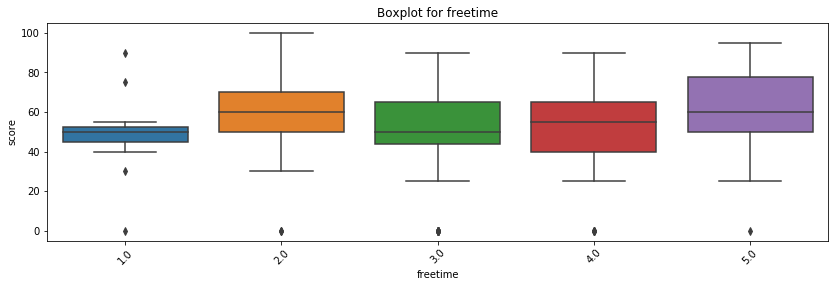

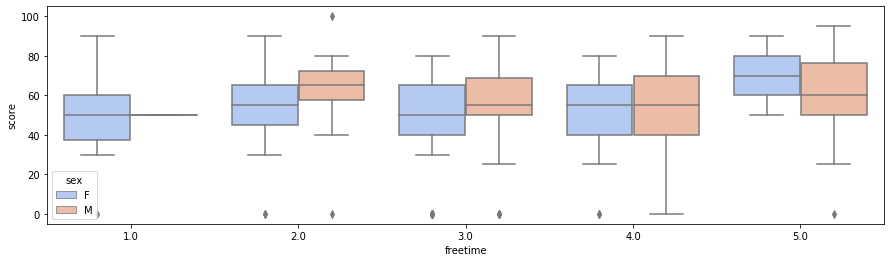

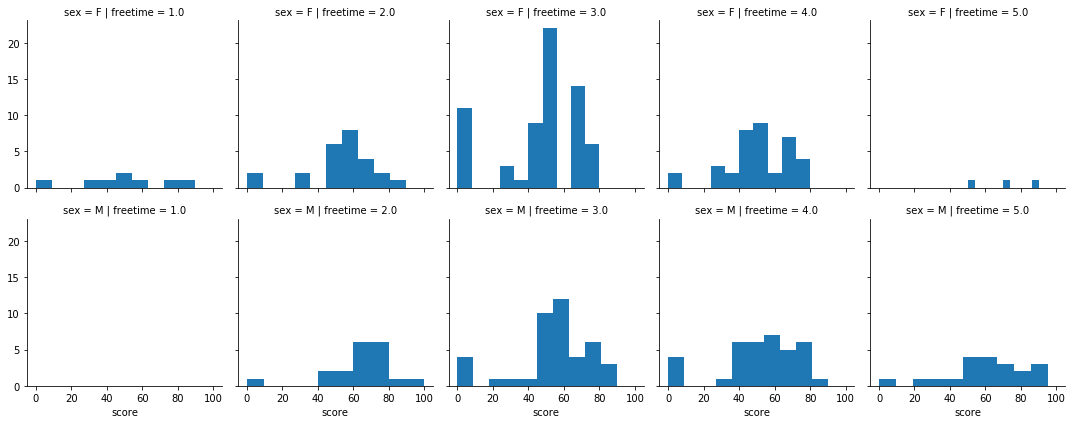

In [255]:
get_boxplot('score','freetime')

plt.figure(figsize=(15,4));
sns.boxplot(x="freetime", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

g = sns.FacetGrid(db, col="freetime", row="sex")
g = g.map(plt.hist, "score").add_legend();

Опять подтверждается теория, что чем больше свободного времени у мальчиков, тем выше они получают оценку. Цифра 5 означает много свободного времени. Далее проверим как они проводят время с друзьями.

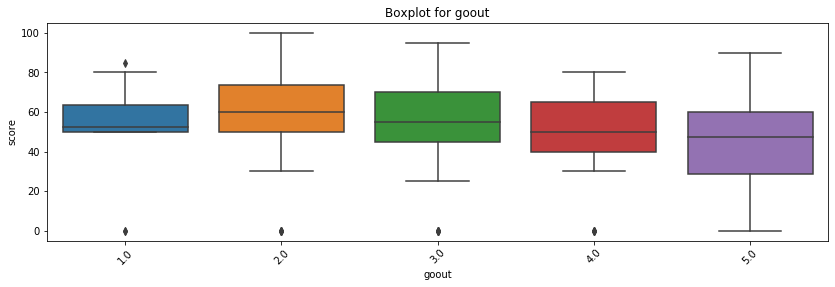

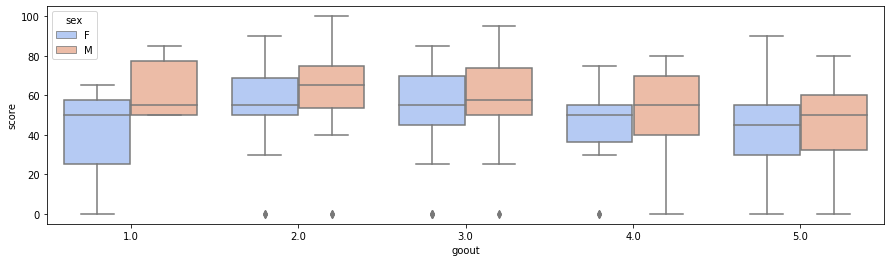

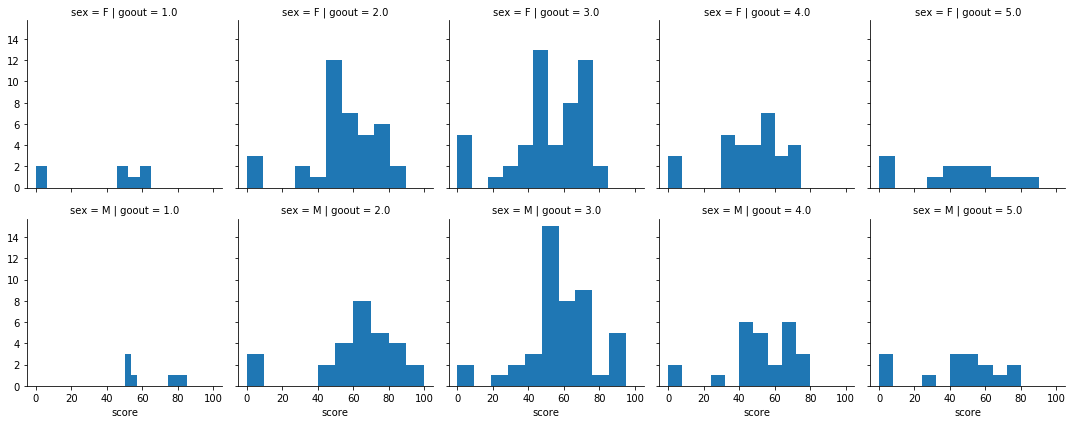

In [256]:
get_boxplot('score','goout')

plt.figure(figsize=(15,4));
sns.boxplot(x="goout", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

g = sns.FacetGrid(db, col="goout", row="sex")
g = g.map(plt.hist, "score").add_legend();

Оставляем этот признак, так как на первом графике всё очень скачит туда сюда. И максимальные значения прыгают и размер выброса у всех разный. Кстати тут мы видим, что и мальчики и девочки примерно одинаково проводят время с друзьями.

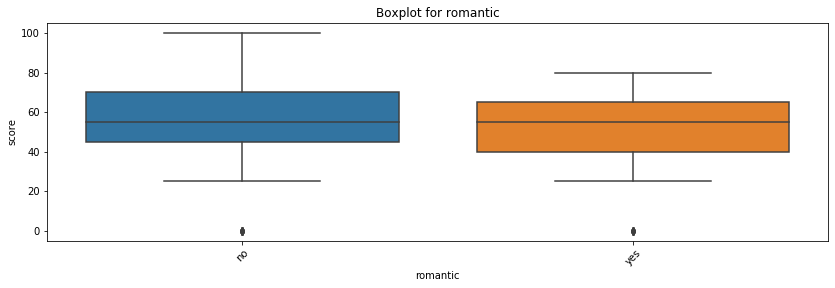

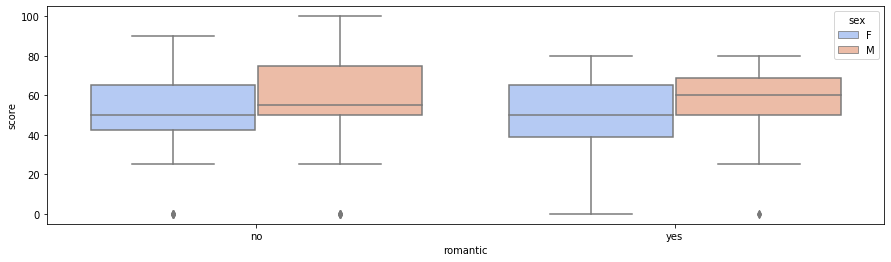

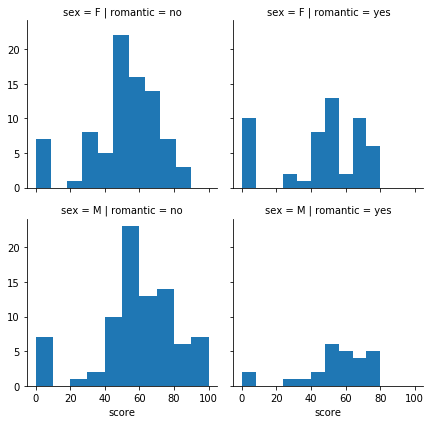

In [257]:
get_boxplot('score','romantic')

plt.figure(figsize=(15,4));
sns.boxplot(x="romantic", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

g = sns.FacetGrid(db, col="romantic", row="sex")
g = g.map(plt.hist, "score").add_legend();

Забавно, что те у кого есть пара у них хуже баллы. Посмотрим связанно ли это с посещаемостью.

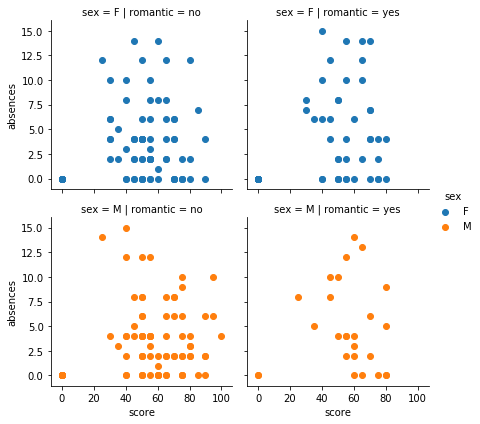

In [258]:

g = sns.FacetGrid(db, col="romantic", row="sex", hue='sex')
g = g.map(plt.scatter, "score", "absences").add_legend();

Ничего такого и не скажешь, видимо пропуски не только по причине отношений. В любом случае оставим данный показатель. Так как до этого было видно, что у девочек без отношений больше максимальных результатов.

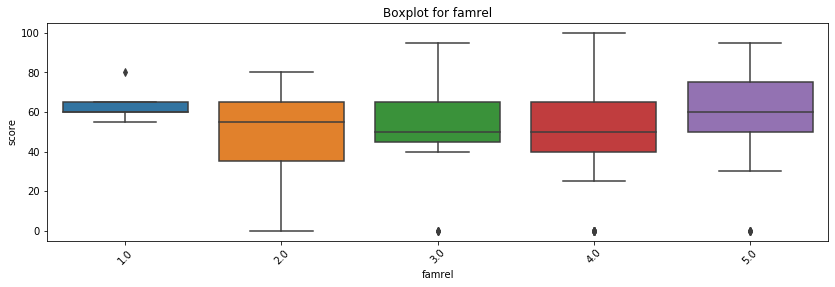

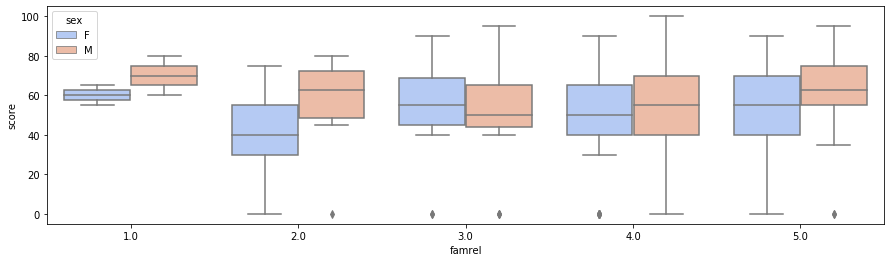

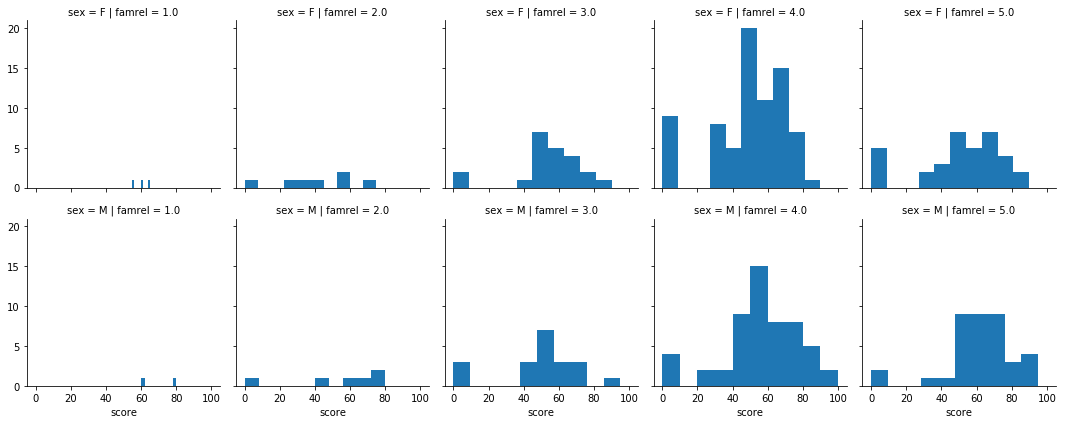

In [259]:
get_boxplot('score','famrel')

plt.figure(figsize=(15,4));
sns.boxplot(x="famrel", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

g = sns.FacetGrid(db, col="famrel", row="sex")
g = g.map(plt.hist, "score").add_legend();

Оставим этот признак, так как на первом графике видно волнообразный эффект. 

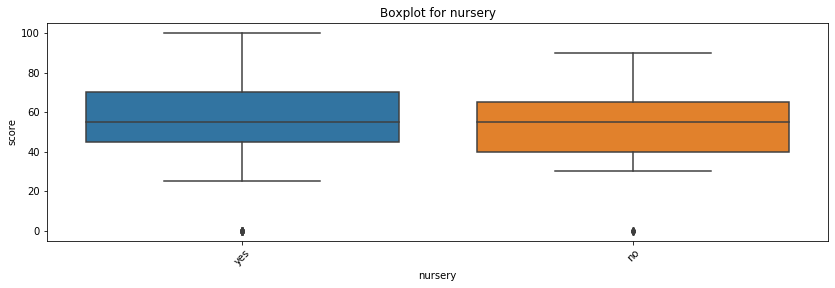

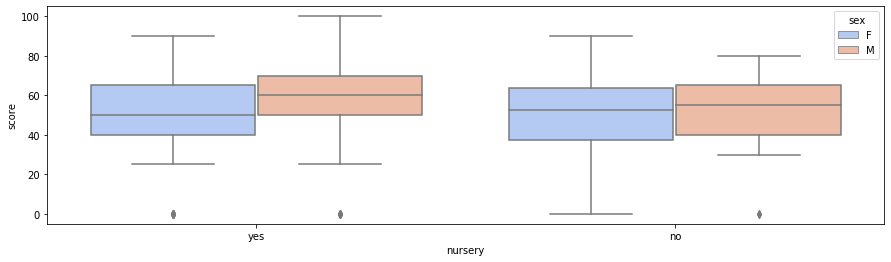

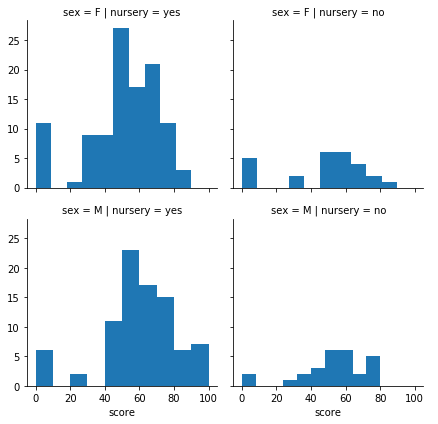

In [260]:
get_boxplot('score','nursery')

plt.figure(figsize=(15,4));
sns.boxplot(x="nursery", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

g = sns.FacetGrid(db, col="nursery", row="sex")
g = g.map(plt.hist, "score").add_legend();

На первом графике видно, что медианное значение примерно одинаково. Поэтому можно исключить данный признак, да и здравый смысл нам говорит, что уж больно слабое влияние признака посещения детского сада на успеваемость. На выстраивание взаимоотношений конечно может влиять, такой ребёнок более приспособлен.

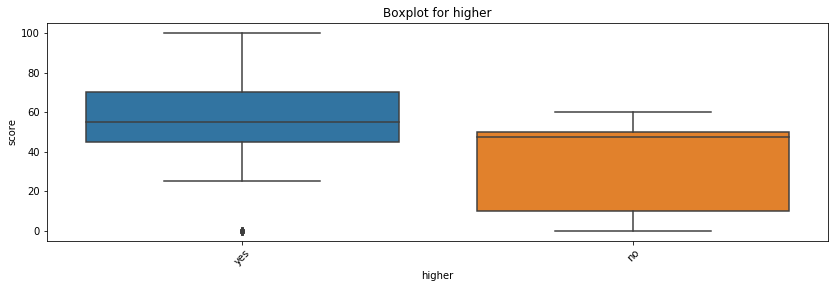

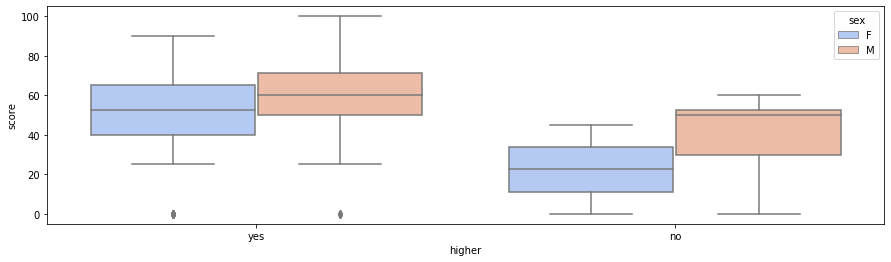

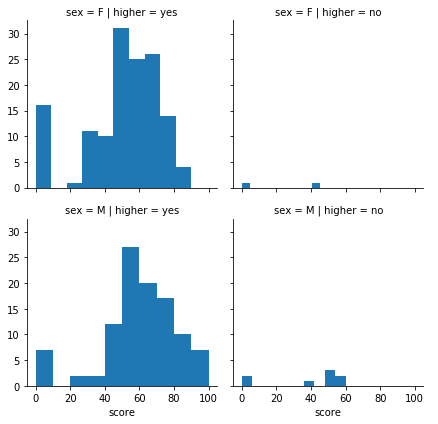

In [261]:
get_boxplot('score','higher')

plt.figure(figsize=(15,4));
sns.boxplot(x="higher", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

g = sns.FacetGrid(db, col="higher", row="sex")
g = g.map(plt.hist, "score").add_legend();

Однозначно оставляем, так как видим сильный перекос в сторону желания получить образование и хорошим баллом.

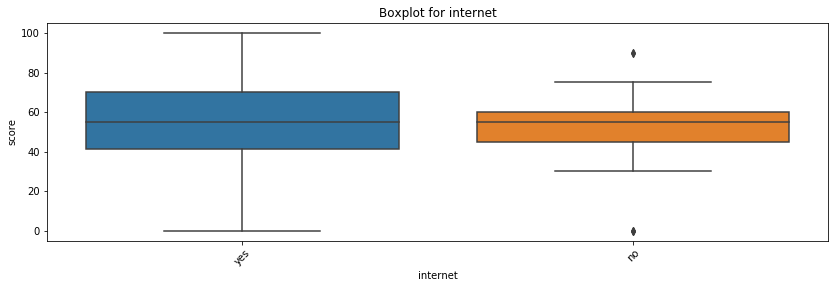

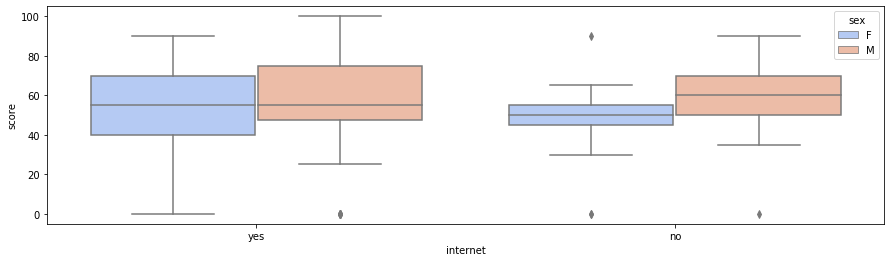

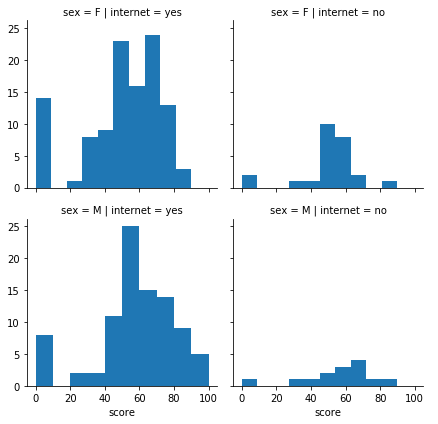

In [262]:
get_boxplot('score','internet')

plt.figure(figsize=(15,4));
sns.boxplot(x="internet", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

g = sns.FacetGrid(db, col="internet", row="sex")
g = g.map(plt.hist, "score").add_legend();

db['internet_val'] = np.where(db['internet'] == 'yes', 1, 0)



Сложно судить, но учитывая слабую выборку, можно заметить, что у кого нет интернета у них нет сильно маленьких баллов. Поэтому оставляем признак.

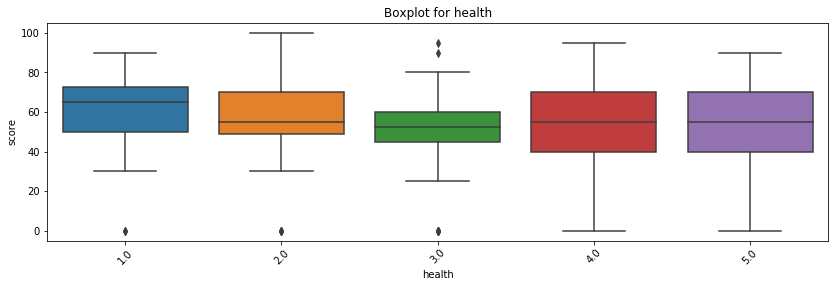

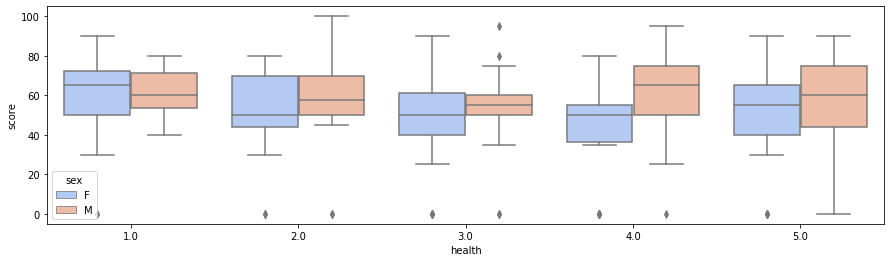

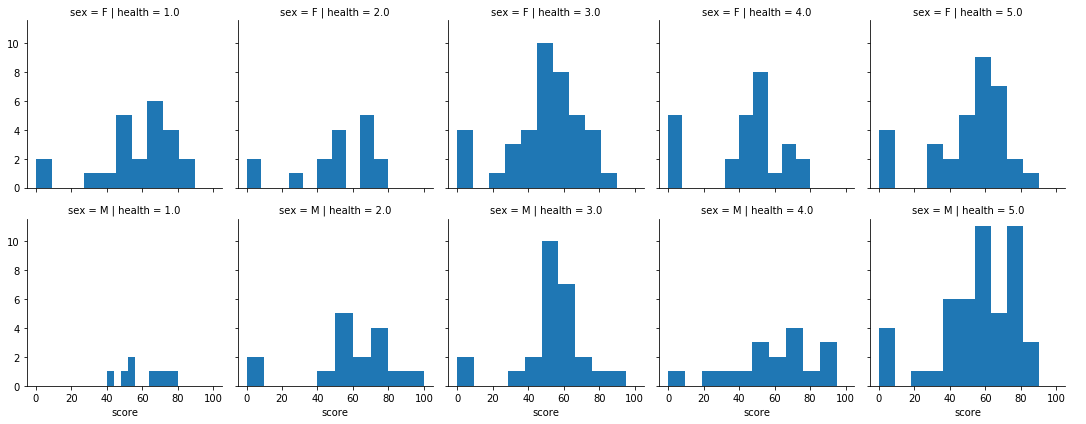

In [263]:
get_boxplot('score','health')

plt.figure(figsize=(15,4));
sns.boxplot(x="health", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

g = sns.FacetGrid(db, col="health", row="sex")
g = g.map(plt.hist, "score").add_legend();

По здоровью можно сказать, что после цифры 4 начинают появлятся плохие результаты, значит есть некий предел. Оставим этот признак.

<Figure size 432x288 with 0 Axes>

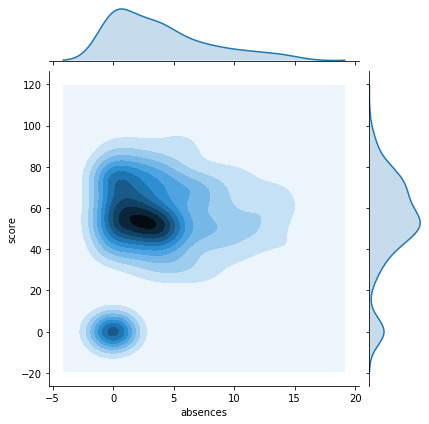

In [264]:
plt.figure();
sns.jointplot(x='absences', y='score', data=db, kind='kde');
plt.show();

Видно что кто больше пропускал больше 5 у них уже падает оценка за тест. Поэтому тут есть некая связь, признак оставляем.

Попробуем провести проверку гипотезы, что распределение оценок между категорийными признаками одинаково.

In [271]:
cols = ['sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian']
get_stat_dif_of('score', cols);


Найдены статистически значимые различия для колонки Mjob


C:\Users\prosa\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\prosa\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\prosa\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [266]:
cols = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
get_stat_dif_of('score', cols);

Статистически значимые различия НЕ найдены для колонок


Ничего такого не найдено, кроме признака Mjob, мы его и так оставили.

В результате анализа данных для последующего построения и обучения модели, следует оставить следующие столбцы:
- school 
- age
- address
- Pstatus
- Medu
- Mjob
- reason
- studytime
- failures
- schoolsup
- famsup
- paid
- freetime
- goout
- romantic
- famrel
- higher
- internet
- health
- absences

По остальным столбцам выявленна слабая связь с оценкой, эти столбцы не следует добавлять в модель:
- sex
- famsize
- Fedu
- Fjob
- guardian
- traveltime
- activities
- nursery
